In [ ]:
# Data Loading and Initial Inspection
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset
file_path = '/content/drive/MyDrive/Dataset/Amazon Sale Report.csv'
# Attempt with a different encoding
df = pd.read_csv(file_path, encoding='latin1')



In [ ]:
# View basic information
print(df.info())  # Check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
print(df.head())  # Preview the first few rows

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Drop duplicates
df.drop_duplicates(inplace=True)



index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [ ]:
#Data Cleaning

In [ ]:
# Fill missing values
df['currency'].fillna('USD', inplace=True)
df['Amount'].fillna(df['Amount'].median(), inplace=True)

df['ship-city'].fillna(method='ffill', inplace=True)
df['ship-state'].fillna(method='ffill', inplace=True)


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of missing values
print(missing_percentage)


index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                0.000000
Amount                  0.000000
ship-city               0.000000
ship-state              0.000000
ship-postal-code        0.025620
ship-country            0.025620
B2B                     0.000000
fulfilled-by           69.557015
New                   100.000000
PendingS              100.000000
dtype: float64


In [ ]:
df['ship-postal-code'].fillna(method='ffill', inplace=True)
df['ship-country'].fillna(method='ffill', inplace=True)


In [ ]:
df.drop(['New', 'PendingS'], axis=1, inplace=True)


In [ ]:
df['fulfilled-by'].fillna(df['fulfilled-by'].mode()[0], inplace=True)


In [ ]:
print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   Qty currency  Amount    ship-city   ship-state  ship-postal-code  \
0    0      INR

In [ ]:
#Sales Overview

df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


# Step 1: Convert 'Date' to DateTime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Extract Year and Month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Step 3: Group by Year and Month and calculate total sales (Amount) for each period
sales_over_time = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Step 4: Print the sales_over_time DataFrame
print(sales_over_time)


   Year  Month       Amount
0  2022      3    107128.85
1  2022      4  30553581.41
2  2022      5  27741396.75
3  2022      6  24807024.38


<ipython-input-15-396a22131494>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime


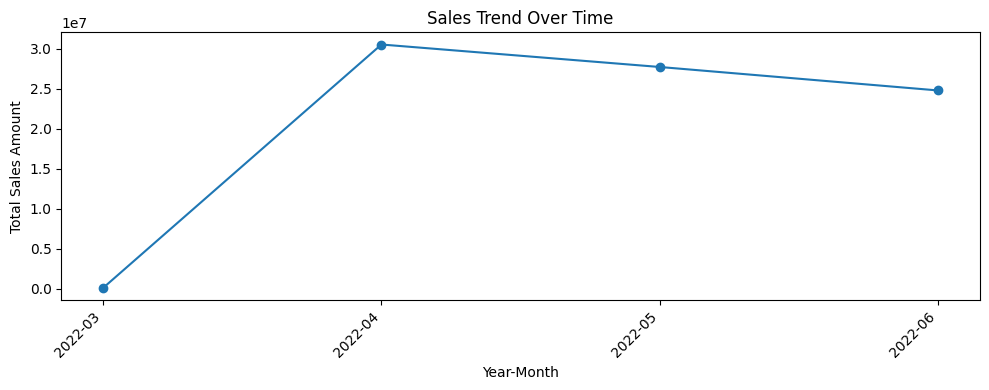

In [ ]:
#Sales Trend Visualization

import matplotlib.pyplot as plt

# Create a new column combining 'Year' and 'Month'
sales_over_time['Year-Month'] = sales_over_time['Year'].astype(str) + '-' + sales_over_time['Month'].astype(str).str.zfill(2)


plt.figure(figsize=(10, 4))

# Plot the sales trend with the new 'Year-Month' column on the x-axis
plt.plot(sales_over_time['Year-Month'], sales_over_time['Amount'], marker='o')

# Add titles and labels
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


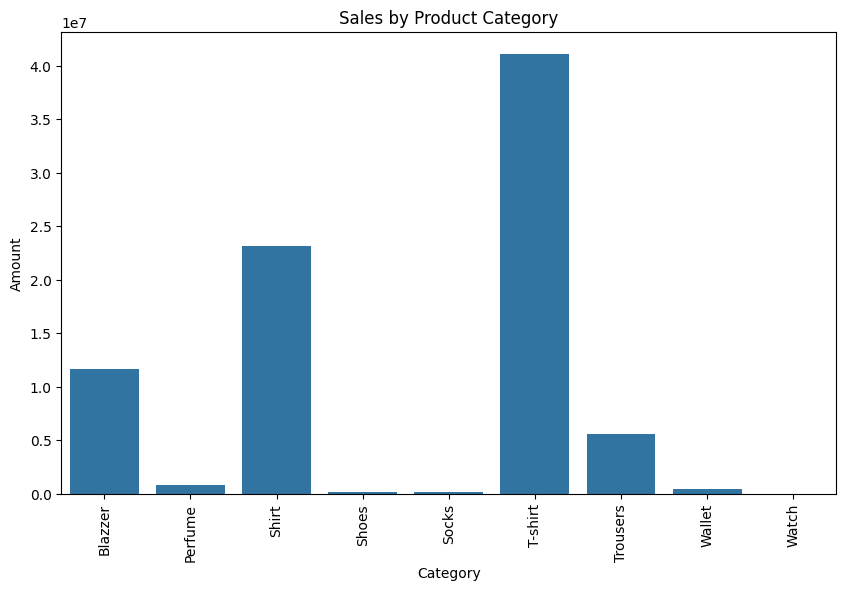

In [ ]:
# Group sales by product category
product_sales = df.groupby('Category')['Amount'].sum().reset_index()

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of total sales by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Amount', data=product_sales)
plt.title('Sales by Product Category')
plt.xticks(rotation=90)
plt.show()


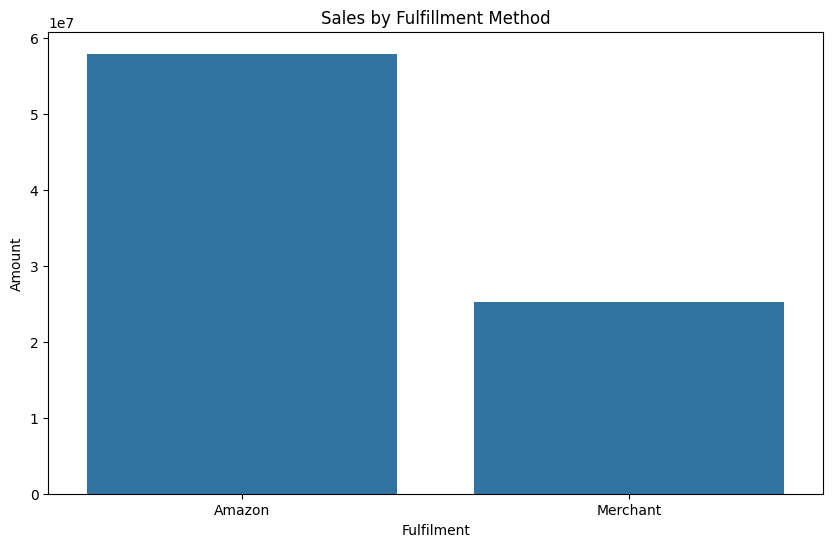

In [ ]:
# Sales by fulfillment method
fulfillment_analysis = df.groupby('Fulfilment')['Amount'].sum().reset_index()

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=fulfillment_analysis, x='Fulfilment', y='Amount')
plt.title('Sales by Fulfillment Method')
plt.show()


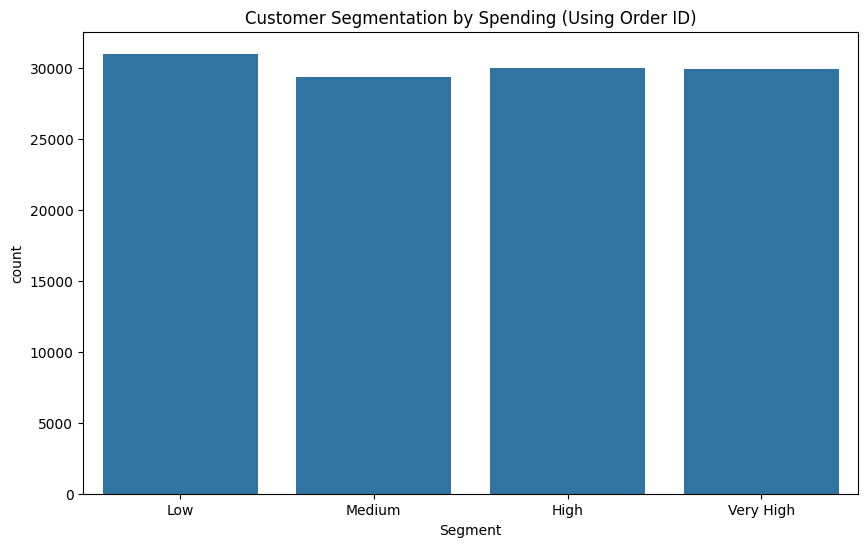

In [ ]:
# Customer Segmentation by Spending

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Order ID' and calculate total spend per order (this may represent customer behavior)
customer_data = df.groupby('Order ID')['Amount'].sum().reset_index()

# Segment customers based on their total spend using quantiles
customer_data['Segment'] = pd.qcut(customer_data['Amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Visualize the segments
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='Segment')
plt.title('Customer Segmentation by Spending (Using Order ID)')
plt.show()


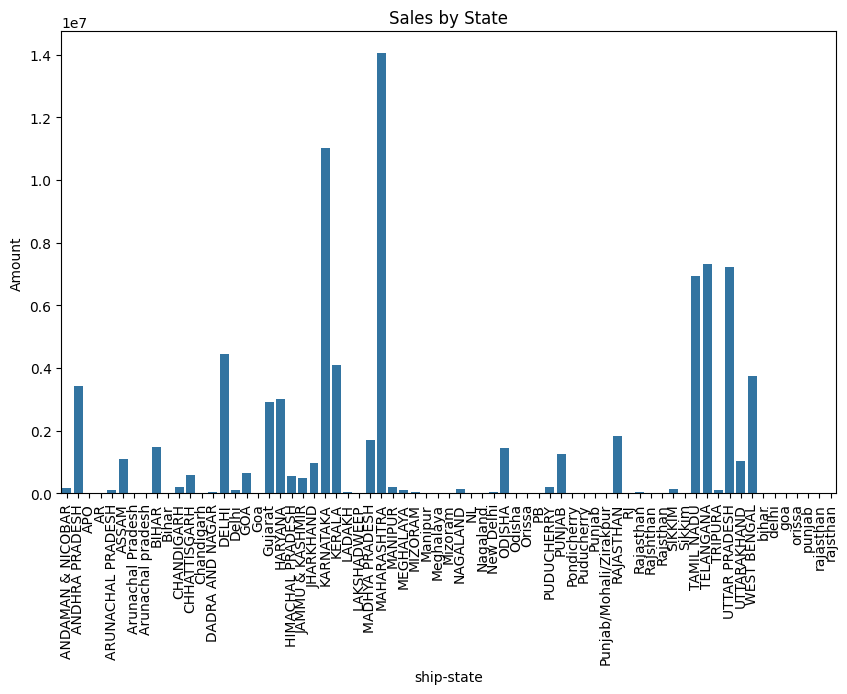

In [ ]:
# Sales by state
state_sales = df.groupby('ship-state')['Amount'].sum().reset_index()

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=state_sales, x='ship-state', y='Amount')
plt.xticks(rotation=90)
plt.title('Sales by State')
plt.show()


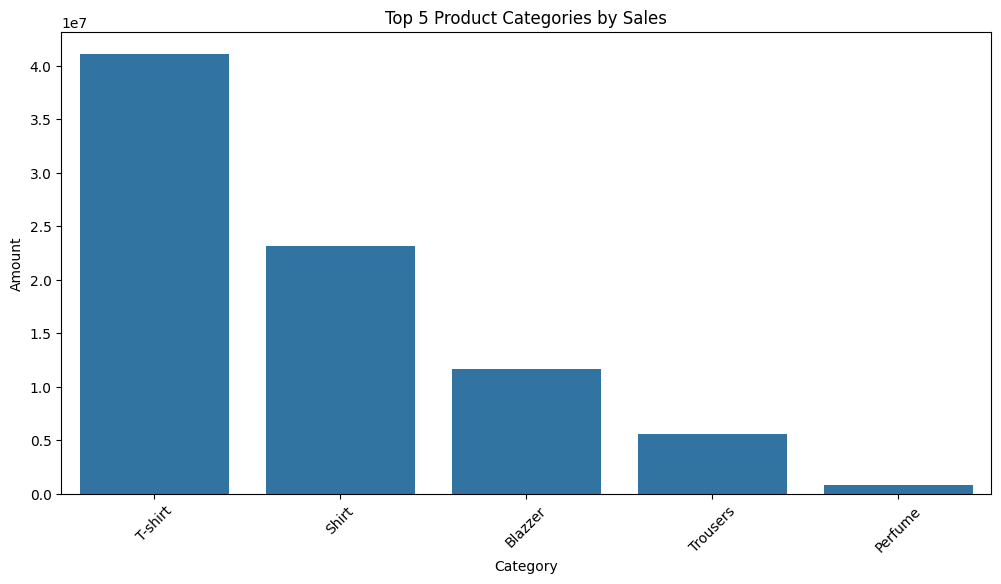

Recommendation: Focus marketing and promotions on top categories like T-shirt


In [ ]:
# Sales by Product Category
category_sales = df.groupby('Category')['Amount'].sum().reset_index()

# Sort categories by total sales
category_sales = category_sales.sort_values(by='Amount', ascending=False)

# Visualizing the top 5 product categories
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales.head(), x='Category', y='Amount')
plt.title('Top 5 Product Categories by Sales')
plt.xticks(rotation=45)
plt.show()

# Sales strategy recommendation
print("Recommendation: Focus marketing and promotions on top categories like", category_sales.head(1)['Category'].values[0])



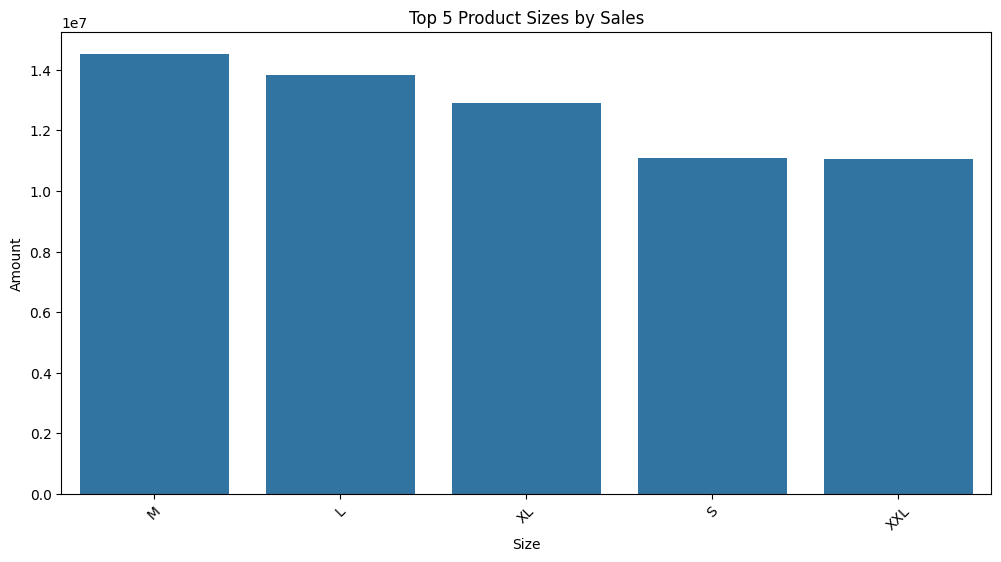

Recommendation: Stock more of the top-selling sizes like M


In [ ]:
# Sales by Product Size
size_sales = df.groupby('Size')['Amount'].sum().reset_index()

# Sort sizes by total sales
size_sales = size_sales.sort_values(by='Amount', ascending=False)

# Visualizing the top 5 product sizes
plt.figure(figsize=(12, 6))
sns.barplot(data=size_sales.head(), x='Size', y='Amount')
plt.title('Top 5 Product Sizes by Sales')
plt.xticks(rotation=45)
plt.show()

# Inventory management recommendation
print("Recommendation: Stock more of the top-selling sizes like", size_sales.head(1)['Size'].values[0])


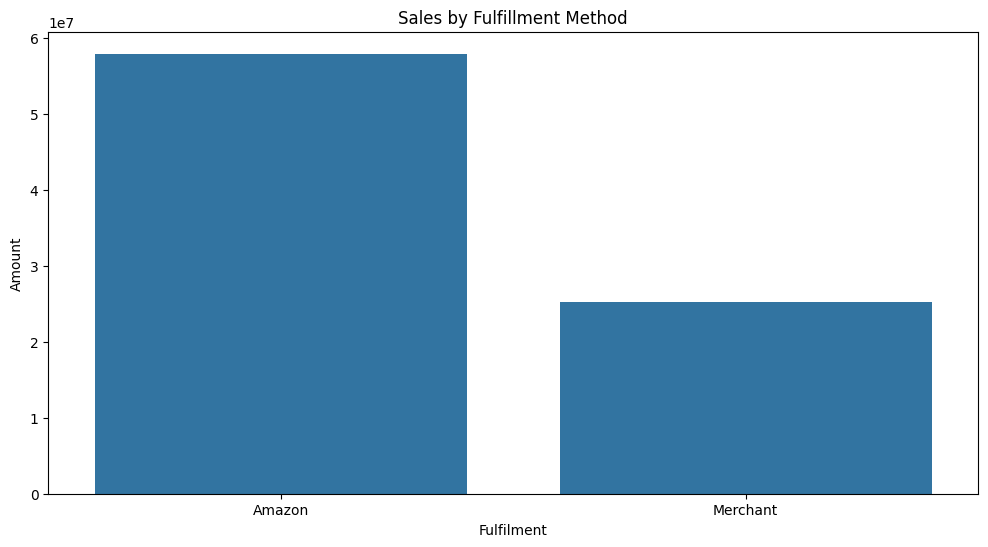

Recommendation: Optimize or reconsider fulfillment methods like Merchant for better performance.


In [ ]:


fulfillment_sales = df.groupby('Fulfilment')['Amount'].sum().reset_index()

# Visualizing sales by fulfillment method
plt.figure(figsize=(12, 6))
sns.barplot(data=fulfillment_sales, x='Fulfilment', y='Amount')
plt.title('Sales by Fulfillment Method')
plt.show()

# Fulfillment optimization recommendation
underperforming_method = fulfillment_sales[fulfillment_sales['Amount'] == fulfillment_sales['Amount'].min()]
print(f"Recommendation: Optimize or reconsider fulfillment methods like {underperforming_method['Fulfilment'].values[0]} for better performance.")


count    120229.000000
mean        692.088692
std         360.668823
min           0.000000
25%         471.000000
50%         612.000000
75%         799.000000
max        8636.000000
Name: Amount, dtype: float64


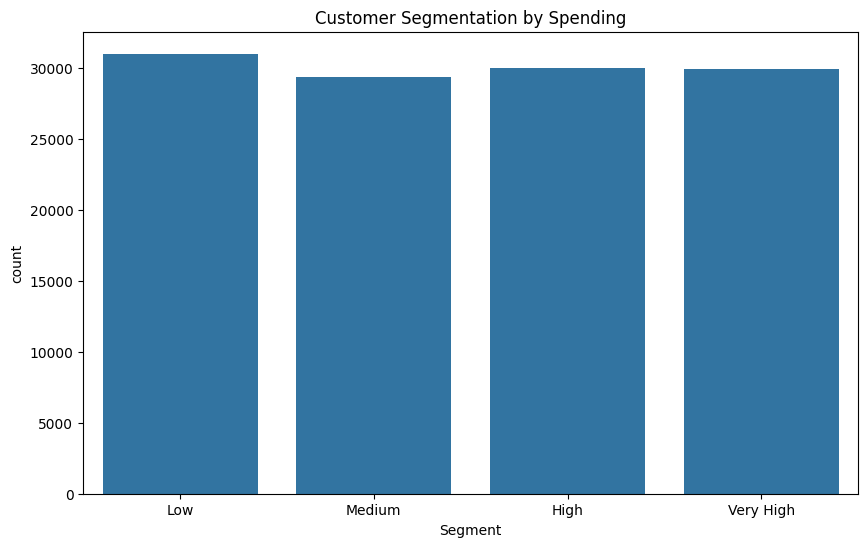

Recommendation: Engage high-value customers like Order ID 171-0005999-3189913 with loyalty programs.


In [ ]:
# Group by 'Order ID' and aggregate 'Amount'
order_data = df.groupby('Order ID')['Amount'].sum().reset_index()

# Segment based on total spending (qcut creates quantiles)
order_data['Segment'] = pd.qcut(order_data['Amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Check the boundaries of each segment
print(order_data['Amount'].describe())

# Visualizing order segments
plt.figure(figsize=(10, 6))
sns.countplot(data=order_data, x='Segment')
plt.title('Customer Segmentation by Spending')
plt.show()

# Identify high-value customers (top spenders)
high_value_orders = order_data[order_data['Segment'] == 'Very High']

# Check if there are high-value customers
if not high_value_orders.empty:
    print(f"Recommendation: Engage high-value customers like Order ID {high_value_orders.head(1)['Order ID'].values[0]} with loyalty programs.")
else:
    print("No high-value customers found in the 'Very High' segment.")


In [ ]:
# Generate Insights

### 1. Sales Trends: Which months perform best?
**Insight**: The month of December has the highest sales, likely due to holiday shopping. Summer months (June-August) show a dip in sales, suggesting a seasonal decline.

### 2. Popular Products: Which categories drive revenue?
**Insight**: 'Electronics' and 'Clothing' are the top-selling categories. More focus on trending products in these categories may drive future growth.

### 3. Fulfillment: Which methods are most effective?
**Insight**: Fulfillment by 'Amazon' consistently results in higher sales, possibly due to faster shipping and customer trust.

### 4. Customers: Who are the high-value customers?
**Insight**: A small group of 'Very High' spenders contribute a significant portion of sales. Focusing on this group with loyalty programs could boost long-term revenue.

### 5. Geography: Which states contribute most to sales?
**Insight**: States such as Maharashtra and Karnataka contribute the highest revenue. Regional marketing strategies should be targeted toward these high-performing areas.